In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data\NEET RR 5.0 - Sheet1.csv')
df.head()

,Lesson Number,Subject,Topic,Hours,Minutes,Total Time
0,1.0,Anatomy,Embryology,4.0,10.0,4.17
1,2.0,Anatomy,Neuroanatomy,4.0,3.0,4.05
2,3.0,Anatomy,Neuroanatomy 2,3.0,43.0,3.72
3,4.0,Anatomy,Back and Thorax,2.0,30.0,2.50
4,5.0,Anatomy,Upper and Lower limb,2.0,2.0,2.03


In [8]:
df['time'] = df['Total Time']
df.drop('Total Time', axis=1, inplace=True)
df

,Lesson Number,Subject,Topic,Hours,Minutes,time
0,1.0,Anatomy,Embryology,4.0,10.0,4.17
1,2.0,Anatomy,Neuroanatomy,4.0,3.0,4.05
2,3.0,Anatomy,Neuroanatomy 2,3.0,43.0,3.72
3,4.0,Anatomy,Back and Thorax,2.0,30.0,2.50
4,5.0,Anatomy,Upper and Lower limb,2.0,2.0,2.03
...,...,...,...,...,...,...
119,122.0,Dermat,Dermat 1,2.0,58.0,2.97
120,123.0,Dermat,Dermat 2,2.0,40.0,2.67
121,124.0,Dermat,Dermat 3,1.0,13.0,1.22
122,125.0,Dermat,Image,2.0,11.0,2.18


In [ ]:
df.isnull.sum()

In [49]:
df[df.isnull().any(axis=1)]
df = df.dropna


AttributeError: 'function' object has no attribute 'isnull'

<Axes: xlabel='time', ylabel='Subject'>

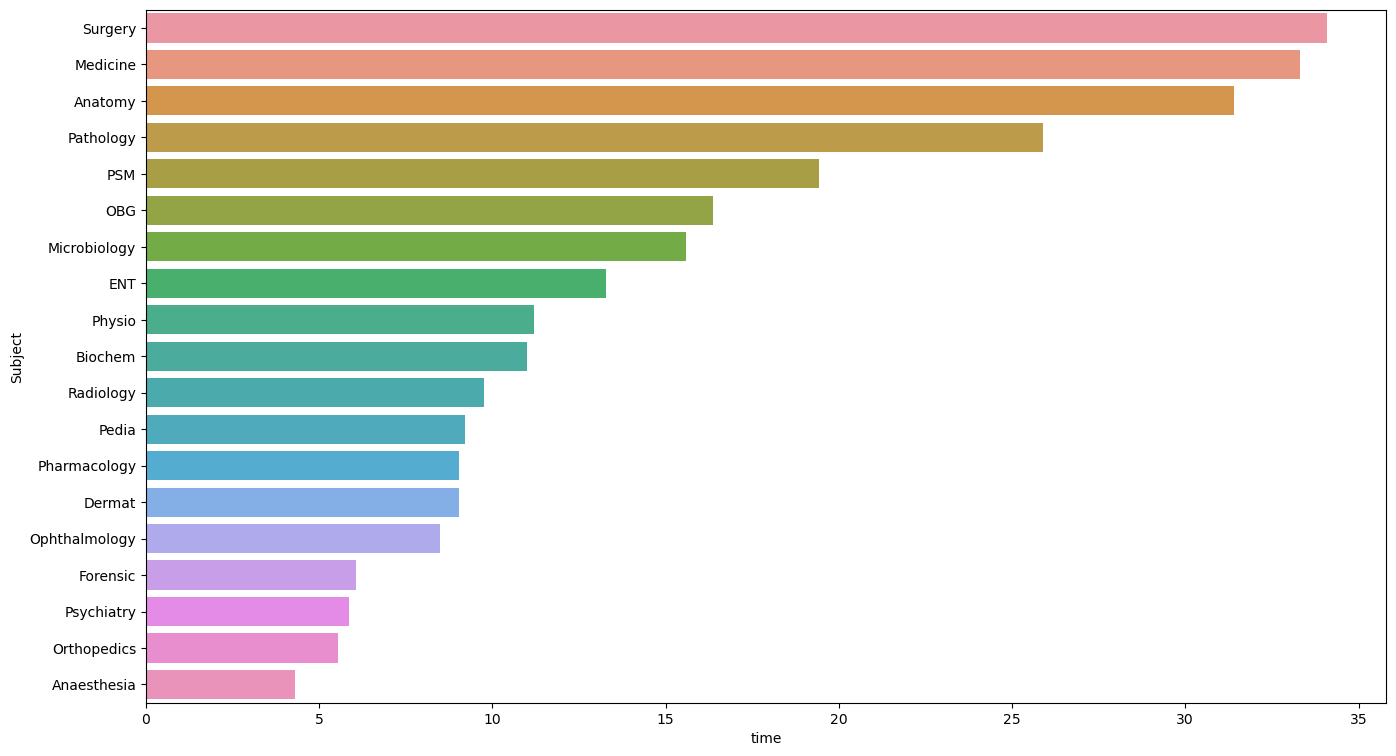

In [37]:
grouped_values = df.groupby('Subject')['time'].sum().reset_index()
sorted = grouped_values.sort_values(by='time',ascending=False)
sorted

plt.figure(figsize=(16,9))
sns.barplot(x='time', y='Subject', data=sorted)

In [39]:
sorted.describe()

,time
count,19.000000
mean,14.677368
std,9.671169
min,4.300000
25%,8.770000
50%,10.990000
75%,17.900000
max,34.090000


<Axes: >

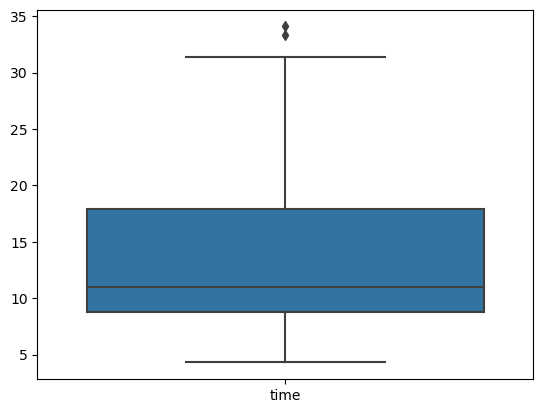

In [41]:
sns.boxplot(data=sorted)

<Axes: xlabel='time', ylabel='Subject'>

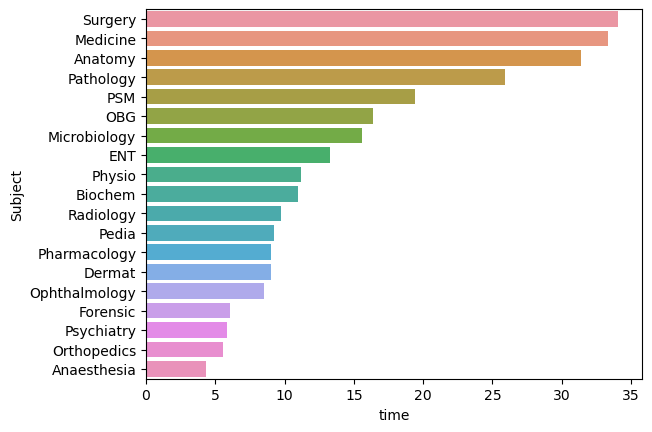

In [37]:
df_time['time'] = df_time.iloc[:,-1]


C:\Users\dradi\AppData\Local\Temp\ipykernel_19092\67516060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['time'] = df_time.iloc[:,-1]


In [ ]:
null_values = df_time.isnull()


In [45]:
print(null_values)

     Subject  Topic  Total Time   time
0      False  False       False  False
1      False  False       False  False
2      False  False       False  False
3      False  False       False  False
4      False  False       False  False
..       ...    ...         ...    ...
119    False  False       False  False
120    False  False       False  False
121    False  False       False  False
122    False  False       False  False
123     True   True       False  False

[124 rows x 4 columns]


<Axes: xlabel='Subject', ylabel='time'>

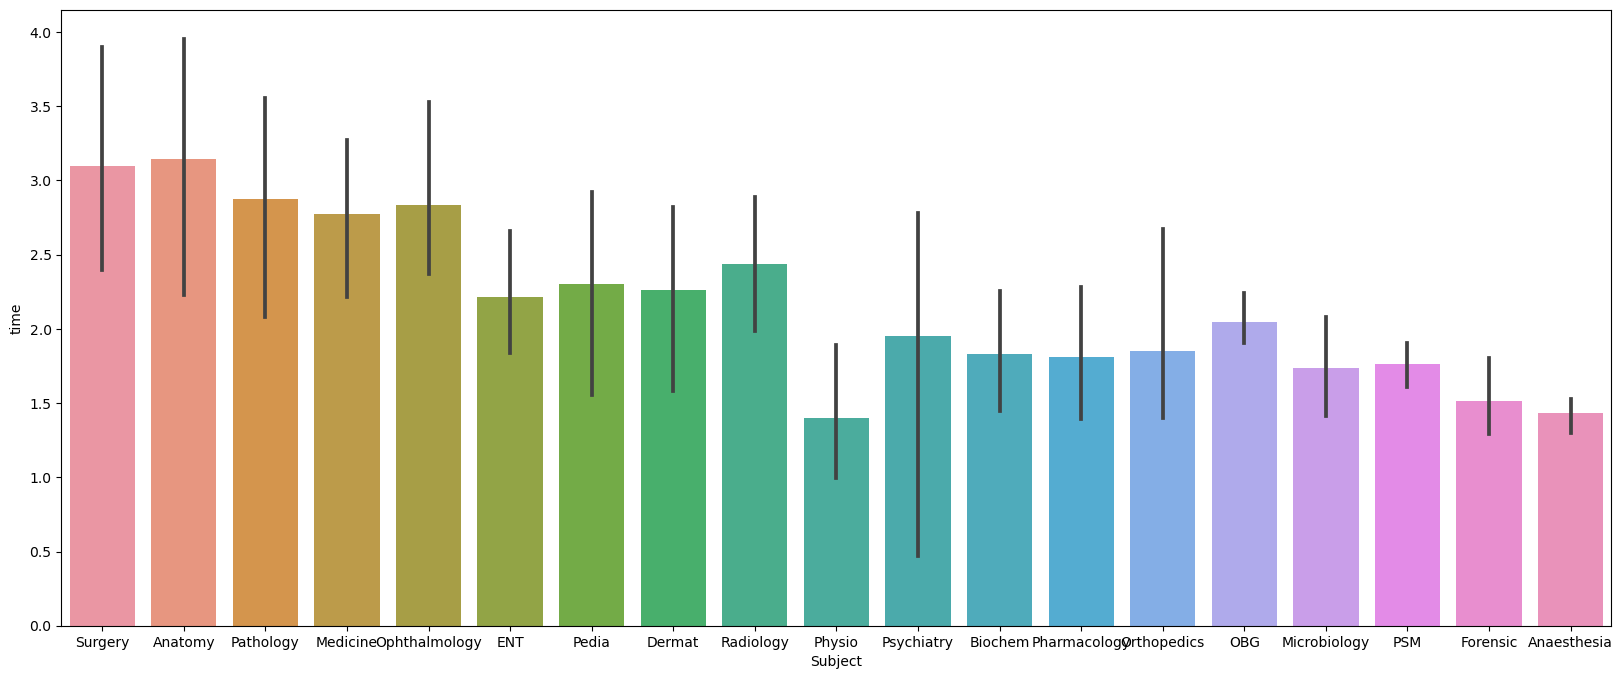

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(x='Subject',y='time', data = df_time)
